# Machine Learning Project I

Contributors:
* Yahia Ehab : 70-37125
* Mohamed Khaled : 70-00436
* Mariam Amr : 70-01053

# Imports

In [2]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Selection

In [35]:
df_1 = pd.read_csv("./AMLAss1Datasets/bankloan.csv") # Suitable for regression
df_2 = pd.read_csv("./AMLAss1Datasets/data_banknote_authentication.csv") # Suitable for classification
df_3 = pd.read_csv("./AMLAss1Datasets/glasstypePrediction.csv") # Suitable for classification

In [22]:
df_1.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [23]:
df_2.columns

Index(['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet',
       'Image_Entropy', 'Class'],
      dtype='object')

In [24]:
df_3.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# Database Preprocessing

## BankLoan Dataset

* Dataset has no nulls
* Choosing only columns that we will use
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Encoding the categorical features
    ```python
    label_encoder = LabelEncoder() #Convert categorical variables into numerical format
    ```
* Removing outliers using `IQR` method

In [36]:
df_1 = df_1[
    [
        "Age", "Experience", "Income",
        "Family", "CCAvg", "Education",
        "Mortgage", "Personal.Loan", "Securities.Account",
        "CD.Account", "Online", "CreditCard",
    ]
]

# Renaming the columns
df_1.columns = [
    "age", "experience", "income", "family",
    "cc_avg","education", "mortgage", 
    "personal_loan", "securities_account", 
    "cd_account", "online", "credit_card",
]

In [ ]:
# Scaling the numerical features
scaler = StandardScaler()
df_1[["age", "experience", "income", "cc_avg", "mortgage"]] = scaler.fit_transform(
    df_1[["age", "experience", "income", "cc_avg", "mortgage"]]
)

# Encoding the categorical features
label_encoder = LabelEncoder()
df_1["education"] = label_encoder.fit_transform(df_1["education"])

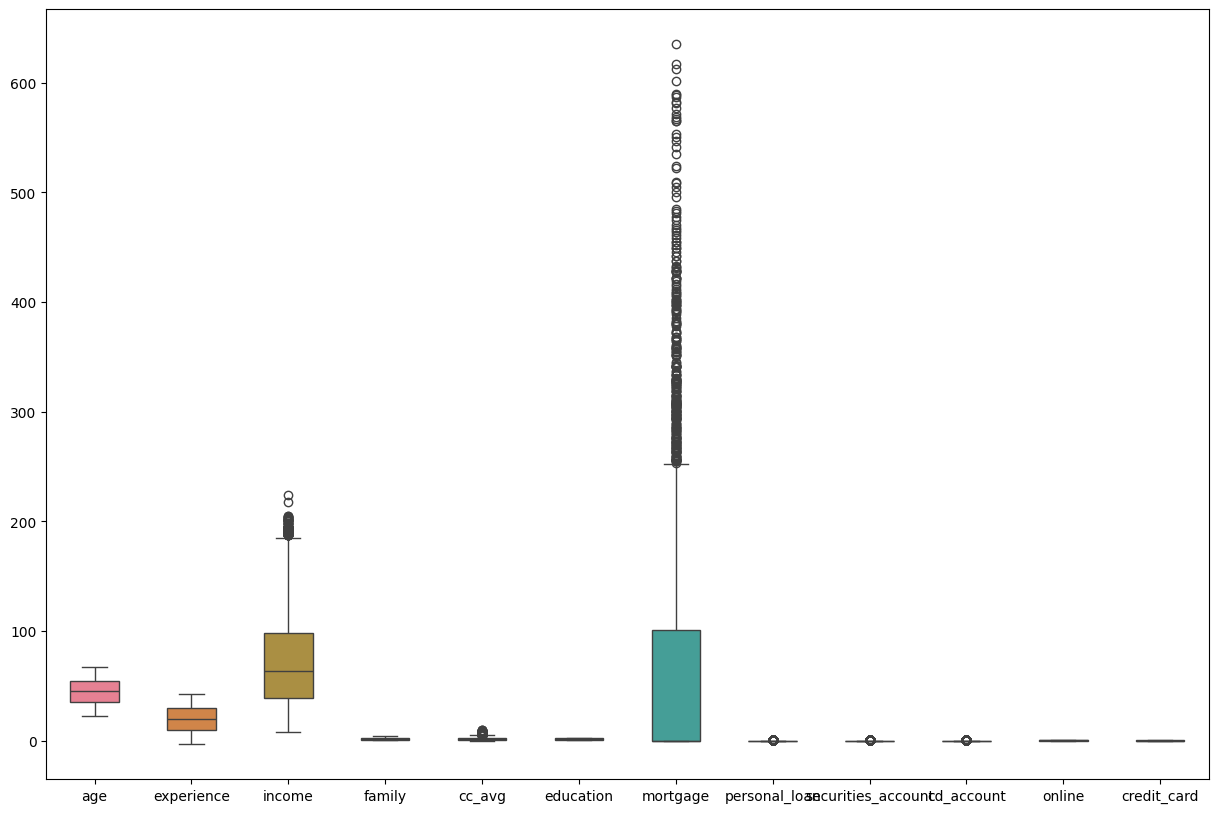

In [41]:
# Check for outliers 
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_1, width=0.5)
plt.show()

In [42]:
# Removing the outliers using the IQR method
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1
df_1 = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
df_1.head()

,age,experience,income,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0


## BanknoteAuthentication Dataset
* Dataset has no nulls
* All columns will be used in our project
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Removing outliers using `IQR` method

In [45]:
# Renaming the columns
df_2.columns = [
    "variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy", "class"
]

In [46]:
# Scaling the numerical features
scaler = StandardScaler()
df_2[["variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy"]] = scaler.fit_transform(
    df_2[["variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy"]]
)

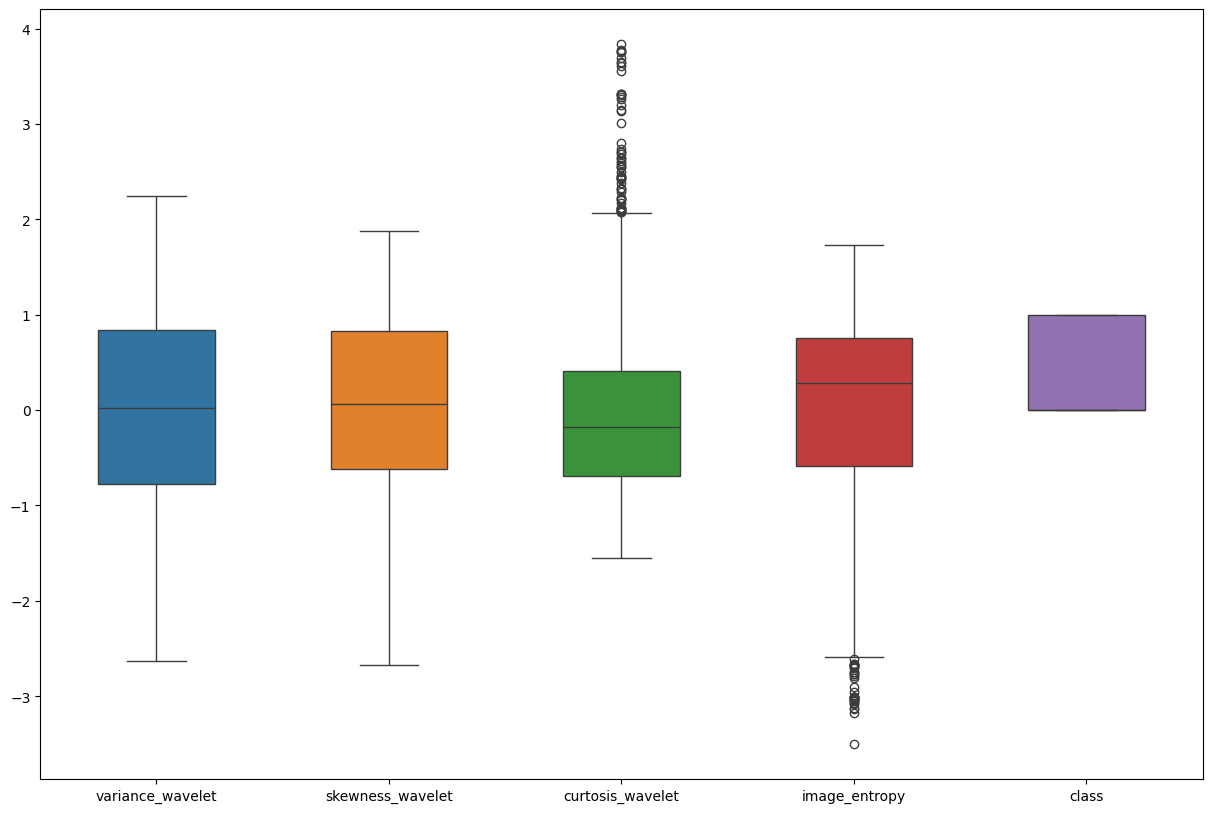

In [47]:
# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_2, width=0.5)
plt.show()

In [48]:
# Removing the outliers using the IQR method
Q1 = df_2.quantile(0.25)
Q3 = df_2.quantile(0.75)
IQR = Q3 - Q1
df_2 = df_2[~((df_2 < (Q1 - 1.5 * IQR)) | (df_2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [49]:
df_2.head()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,image_entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


## GlassTypePrediction Dataset
* Dataset has no nulls
* All columns will be used in our project
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Removing outliers using `IQR` method

In [52]:
# Renaming the columns
df_3.columns = [
    "ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe", "type"
]

In [53]:
# Scaling the numerical features
scaler = StandardScaler()
df_3[["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]] = scaler.fit_transform(
    df_3[["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]]
)

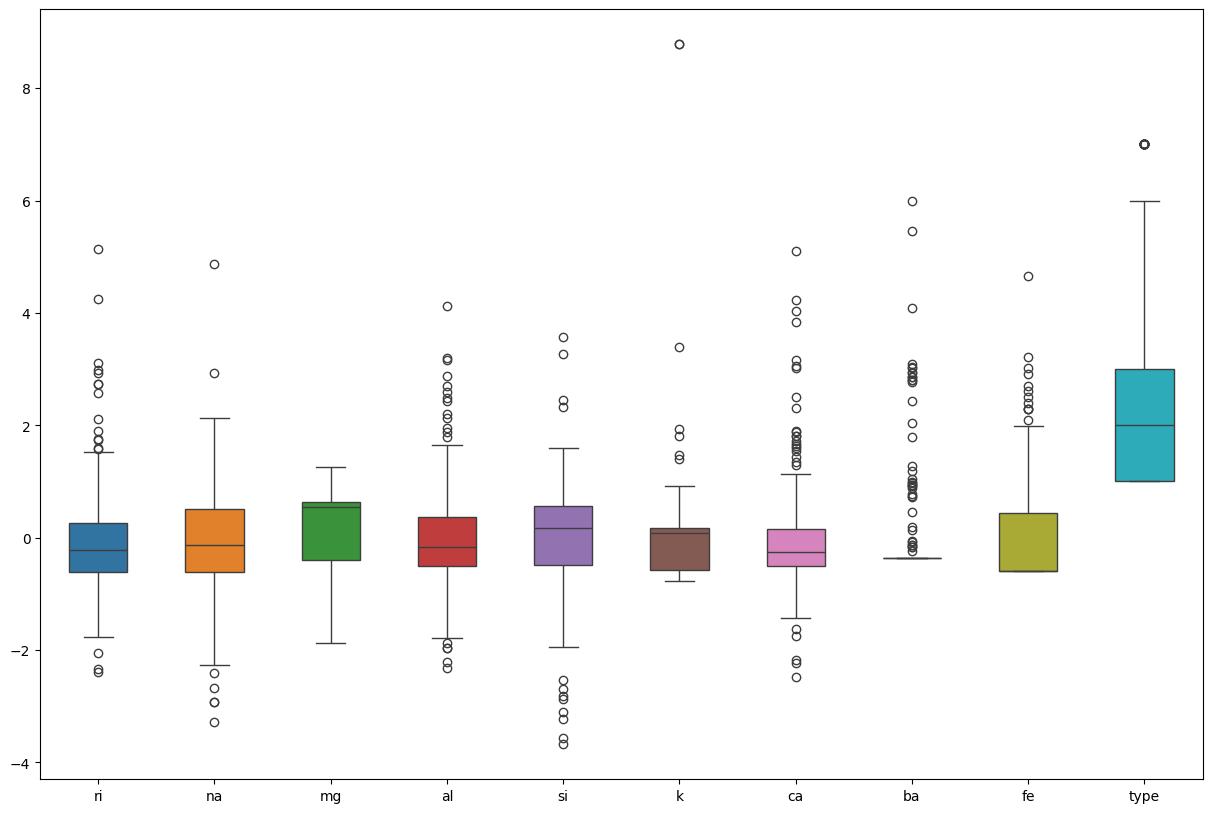

In [54]:
# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_3, width=0.5)
plt.show()

In [55]:
# Removing the outliers using the IQR method
Q1 = df_3.quantile(0.25)
Q3 = df_3.quantile(0.75)
IQR = Q3 - Q1
df_3 = df_3[~((df_3 < (Q1 - 1.5 * IQR)) | (df_3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [59]:
df_3.head()

,ri,na,mg,al,si,k,ca,ba,fe,type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
